In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statistics import mean, stdev

frames = []

for root, dirs, files in os.walk('../data/'):
    for f in files:
        if f.endswith(".csv"):
            file_path = os.path.join(root, f)
            dataframe = pd.read_csv(file_path)
            dataframe.columns=dataframe.columns.str.replace('\t','')
            frames.append(dataframe)

data = pd.concat(frames, sort=False)[['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Utility_Increase']]
data.head()

,Optimal_Affected_Component,Optimal_Failure,Optimal_Utility_Increase
0,Query Service,CF1,49.5
1,User Management Service,CF2,16.0
2,Authentication Service,CF3,31.5
3,Bid and Buy Service,CF3,25.0
4,Item Management Service,CF3,16.0


In [2]:
# function for plotting
def plot_data(data_table):
    lists = data_table.groupby(['Optimal_Affected_Component', 'Optimal_Failure'])['Optimal_Utility_Increase'].apply(list).values
    fig = plt.figure(figsize=(50, 5))
    for l in lists:
        plt.hist(l, 75, alpha=0.5)
    plt.show()

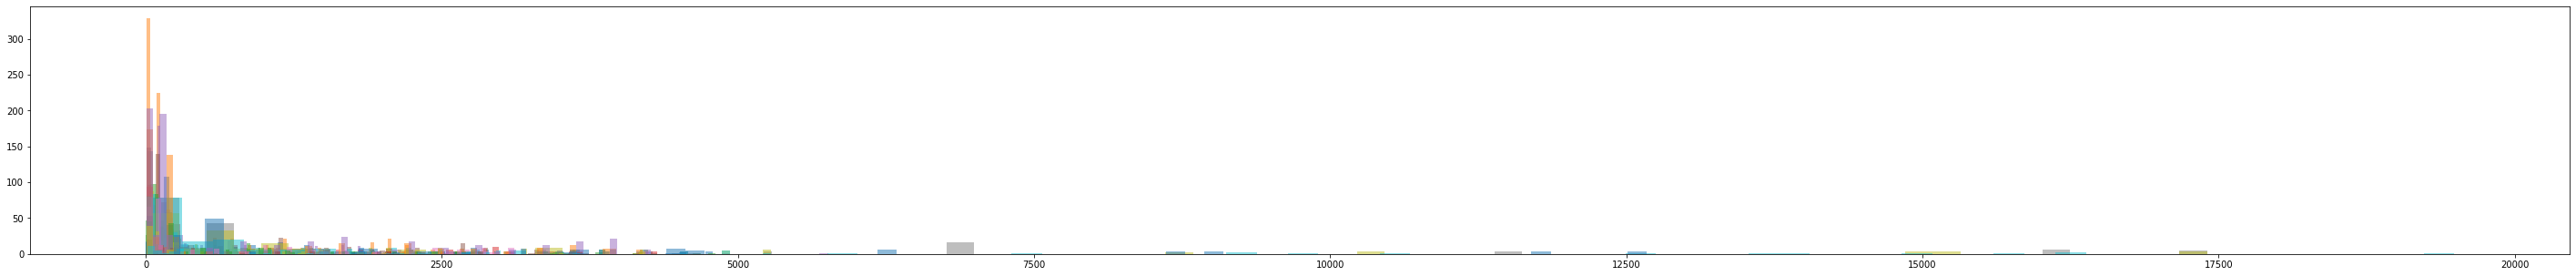

In [3]:
plot_data(data)

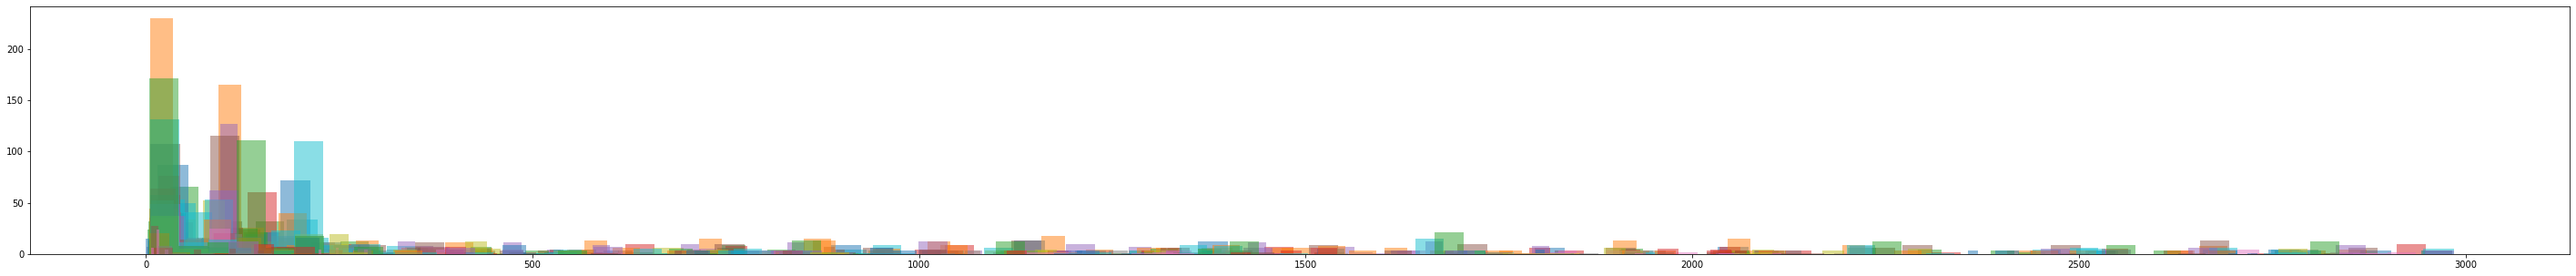

In [4]:
plot_data(data.drop(data[data['Optimal_Utility_Increase'] > 3000].index))

# Data Transformation

## Step 1: Calculate the Standard Deviation and the mean of each <component, failure> combinations

In [5]:
mean_values = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).mean()
stdev_values = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).std().reset_index()

## Step 2: Sort data by mean values 

In [6]:
mean_values = mean_values.sort_values(by=['Optimal_Utility_Increase'], ascending=True)

## Step 3: Iterate over data and transform it

In [7]:
data_new = data.copy()

previous = None
for name, group in mean_values.iterrows():
    if previous is not None:
        pre_std = stdev_values.loc[(stdev_values['Optimal_Affected_Component'] == previous[0]) & (stdev_values['Optimal_Failure'] == previous[1])]['Optimal_Utility_Increase'].tolist()[0]
        cur_std = stdev_values.loc[(stdev_values['Optimal_Affected_Component'] == name[0]) & (stdev_values['Optimal_Failure'] == name[1])]['Optimal_Utility_Increase'].tolist()[0]
        data_new.loc[(data_new['Optimal_Affected_Component'] == name[0]) & (data_new['Optimal_Failure'] == name[1]),'Optimal_Utility_Increase'] += cur_std + pre_std
    previous = name
    
data_new.head()

,Optimal_Affected_Component,Optimal_Failure,Optimal_Utility_Increase
0,Query Service,CF1,8710.045827
1,User Management Service,CF2,1726.679529
2,Authentication Service,CF3,2183.394818
3,Bid and Buy Service,CF3,1699.132796
4,Item Management Service,CF3,1001.708713


## Step 4: Analyse Transformation

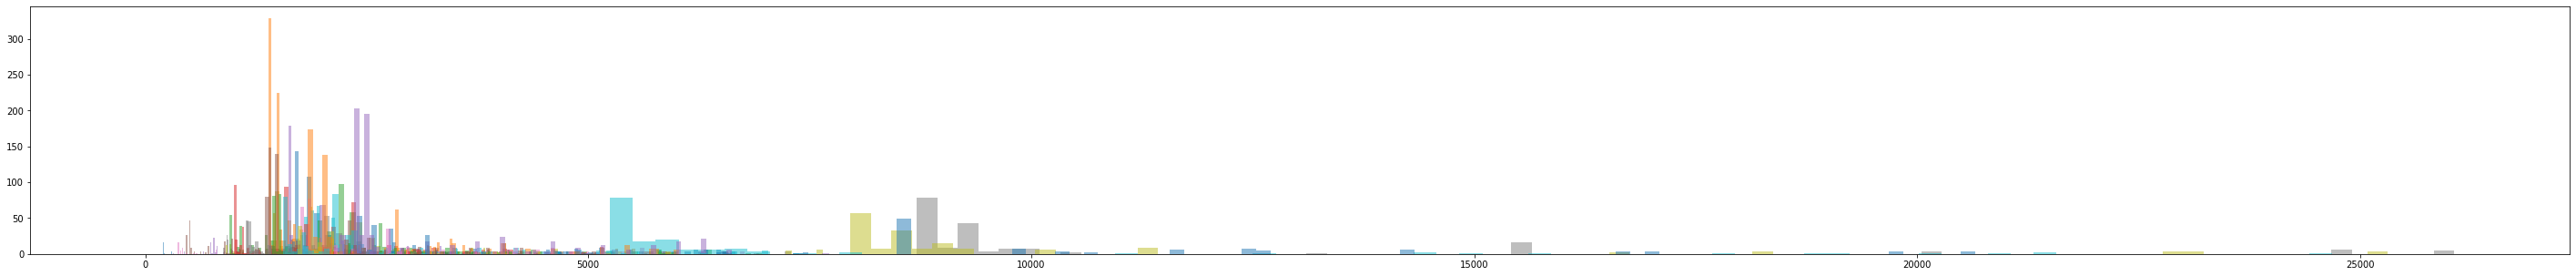

In [8]:
plot_data(data_new)

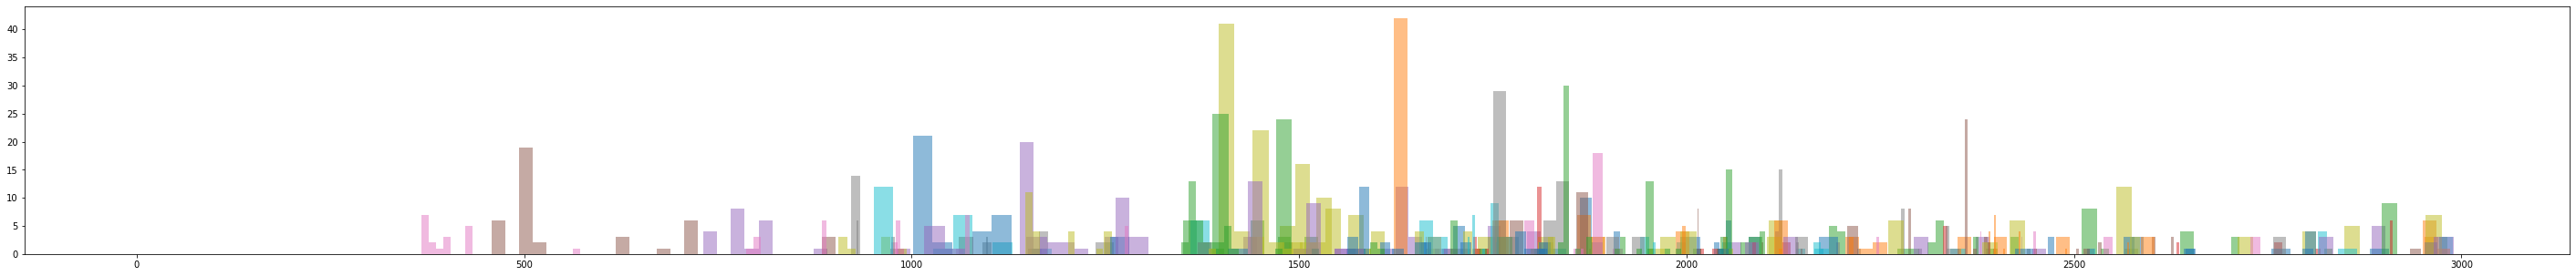

In [9]:
plot_data(data_new.drop(data_new[data_new['Optimal_Utility_Increase'] > 3000].index))

## Step 5: Perform T-Test

In [17]:
from itertools import combinations 
data_lists = data_new.groupby(['Optimal_Affected_Component', 'Optimal_Failure'])['Optimal_Utility_Increase'].apply(list).values
data_lists_combi = combinations(data_lists, 2)
for l in data_lists_combi:
    print(stats.ttest_ind(l[0], l[1]))

Ttest_indResult(statistic=0.28912335993254995, pvalue=0.7728758243113024)
Ttest_indResult(statistic=-3.1427760376428373, pvalue=0.0018028224141825166)
Ttest_indResult(statistic=-5.638259907352662, pvalue=4.323934334262571e-08)
Ttest_indResult(statistic=11.280725795619237, pvalue=3.891034309658097e-23)
Ttest_indResult(statistic=18.063335421412944, pvalue=1.2083482335858966e-47)
Ttest_indResult(statistic=11.949848135242242, pvalue=2.3814219339324876e-24)
Ttest_indResult(statistic=8.472848106091666, pvalue=8.348169658528396e-15)
Ttest_indResult(statistic=5.998753491218452, pvalue=5.061995053510731e-09)
Ttest_indResult(statistic=0.5462240545923365, pvalue=0.5853112590275085)
Ttest_indResult(statistic=2.4817691128887946, pvalue=0.013384953606438169)
Ttest_indResult(statistic=-8.306293987239874, pvalue=6.289005410275684e-15)
Ttest_indResult(statistic=-0.7839378826941777, pvalue=0.4338276710319302)
Ttest_indResult(statistic=-1.7428111833198712, pvalue=0.08277665197087772)
Ttest_indResult(stat

Ttest_indResult(statistic=-10.811631591283264, pvalue=1.0361967075456151e-18)
Ttest_indResult(statistic=-7.066115673824416, pvalue=1.6329726709990207e-11)
Ttest_indResult(statistic=-9.321365600695179, pvalue=2.778563810708076e-17)
Ttest_indResult(statistic=-4.6771135239874635, pvalue=5.2184999158657e-06)
Ttest_indResult(statistic=-13.27396457234334, pvalue=1.9628117553305026e-25)
Ttest_indResult(statistic=-16.04508754133621, pvalue=1.2693495303112446e-39)
Ttest_indResult(statistic=-15.29426544295348, pvalue=5.5488720356298156e-36)
Ttest_indResult(statistic=-11.06703019702423, pvalue=1.155067053468699e-22)
Ttest_indResult(statistic=-20.436531528464368, pvalue=3.384355343643624e-45)
Ttest_indResult(statistic=-13.170506416487495, pvalue=4.44724071783588e-19)
Ttest_indResult(statistic=-7.2451849704436695, pvalue=3.466973284964124e-12)
Ttest_indResult(statistic=-7.2508149730088896, pvalue=1.11064034562464e-09)
Ttest_indResult(statistic=5.037711492294991, pvalue=4.9005342201298035e-06)
Ttest

Ttest_indResult(statistic=-0.6924864953483594, pvalue=0.4900158170826592)
Ttest_indResult(statistic=10.39990082285732, pvalue=5.2520809708754296e-20)
Ttest_indResult(statistic=4.656109896743717, pvalue=6.78836552734382e-06)
Ttest_indResult(statistic=3.2554165928417795, pvalue=0.0014543757223925277)
Ttest_indResult(statistic=-7.016527938297517, pvalue=8.572519990872764e-11)
Ttest_indResult(statistic=-4.623196607152898, pvalue=2.6108410348699994e-05)
Ttest_indResult(statistic=-5.661901731832401, pvalue=8.199758785053987e-07)
Ttest_indResult(statistic=-6.558154914234359, pvalue=1.273844496154016e-05)
Ttest_indResult(statistic=-3.9193593710962253, pvalue=0.0004977804177592301)
Ttest_indResult(statistic=-5.134280694604401, pvalue=1.0358142767936642e-06)
Ttest_indResult(statistic=-4.9792894386971955, pvalue=3.4767094810130876e-06)
Ttest_indResult(statistic=-5.652381884144257, pvalue=6.0634341937437755e-06)
Ttest_indResult(statistic=-2.996316241090486, pvalue=0.024122628699244315)
Ttest_indRe

Ttest_indResult(statistic=-8.363015721341668, pvalue=8.92812806019643e-14)
Ttest_indResult(statistic=4.928999531865163, pvalue=9.795862255159634e-07)
Ttest_indResult(statistic=10.178164570003162, pvalue=3.2421312591790543e-20)
Ttest_indResult(statistic=9.916706532481781, pvalue=7.393446757175578e-20)
Ttest_indResult(statistic=0.8073972020747278, pvalue=0.41991277601537325)
Ttest_indResult(statistic=1.7792912625816333, pvalue=0.07578515756874443)
Ttest_indResult(statistic=-1.2258047283309805, pvalue=0.22245463510973204)
Ttest_indResult(statistic=6.568489797496225, pvalue=5.403237030139768e-10)
Ttest_indResult(statistic=-2.5789317612556473, pvalue=0.010666805811641106)
Ttest_indResult(statistic=-2.058500091961704, pvalue=0.04065918352401658)
Ttest_indResult(statistic=-0.6790851862614513, pvalue=0.49838079271406655)
Ttest_indResult(statistic=2.6923517270081696, pvalue=0.007722063738573268)
Ttest_indResult(statistic=-1.4781250901756349, pvalue=0.14223200664306293)
Ttest_indResult(statistic

Ttest_indResult(statistic=-16.550507847094547, pvalue=2.762421325738017e-42)
Ttest_indResult(statistic=-15.546503373134767, pvalue=9.81348106827612e-38)
Ttest_indResult(statistic=-10.284885707115922, pvalue=1.2960004485747072e-20)
Ttest_indResult(statistic=-20.866261444548453, pvalue=9.357793697634661e-49)
Ttest_indResult(statistic=-3.919999812206383, pvalue=0.00018895040904504869)
Ttest_indResult(statistic=4.8510473020118745, pvalue=1.8987921616064017e-06)
Ttest_indResult(statistic=-0.02578982558778903, pvalue=0.9794908445113484)
Ttest_indResult(statistic=4.80417993213149, pvalue=7.382041687442391e-06)
Ttest_indResult(statistic=9.411756120699938, pvalue=1.4847857926693869e-16)
Ttest_indResult(statistic=-0.36766801175017194, pvalue=0.7133692849039461)
Ttest_indResult(statistic=0.8552221432084227, pvalue=0.39428710663021405)
Ttest_indResult(statistic=-3.4060160215416264, pvalue=0.0008669922552945594)
Ttest_indResult(statistic=3.2992080210074968, pvalue=0.0011201112363045868)
Ttest_indRe

Ttest_indResult(statistic=-4.17989563680832, pvalue=3.4509843993913485e-05)
Ttest_indResult(statistic=-6.516728810831061, pvalue=4.046665254047692e-09)
Ttest_indResult(statistic=-3.3295209365061096, pvalue=0.0016778761602247274)
Ttest_indResult(statistic=-5.195406285419877, pvalue=2.7362759636137227e-07)
Ttest_indResult(statistic=-5.905107678183568, pvalue=1.2447316581030223e-07)
Ttest_indResult(statistic=-5.649624894278574, pvalue=4.717314157630523e-06)
Ttest_indResult(statistic=-2.650942163933834, pvalue=0.009554055144829137)
Ttest_indResult(statistic=-3.562955001845071, pvalue=0.0006651089795544881)
Ttest_indResult(statistic=-4.172982306099779, pvalue=0.00016846049732733645)
Ttest_indResult(statistic=-6.021417375054765, pvalue=1.5756917686316125e-07)
Ttest_indResult(statistic=-10.473331745043037, pvalue=3.954909973723507e-22)
Ttest_indResult(statistic=-8.68972683126672, pvalue=6.379499109030934e-14)
Ttest_indResult(statistic=-13.952254144052525, pvalue=1.8044033488921726e-27)
Ttest_